In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Enable inline plotting (works only in Jupyter)
%matplotlib inline



In [2]:
test= pd.read_csv('C:/Users/SHIVANSH/OneDrive/Desktop/github_projects/test.csv.csv')
train= pd.read_csv('C:/Users/SHIVANSH/OneDrive/Desktop/github_projects/train.csv.csv')

In [3]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
test.shape

(367, 12)

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_original= test.copy()
train_original= train.copy()

In [7]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Univariant Analysis

In [9]:
train['Loan_Status'].value_counts() 

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: xlabel='Loan_Status'>

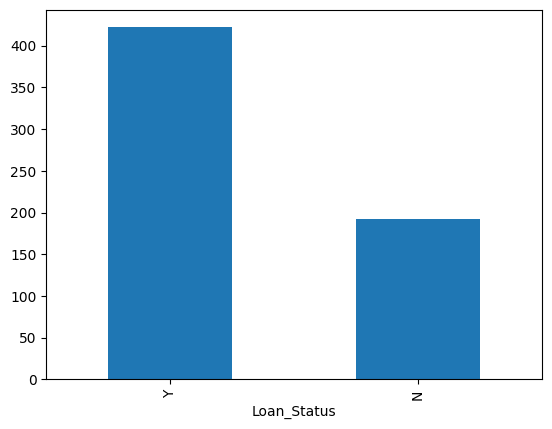

In [10]:
train['Loan_Status'].value_counts().plot.bar()   

Text(0.5, 1.0, 'Loan Status')

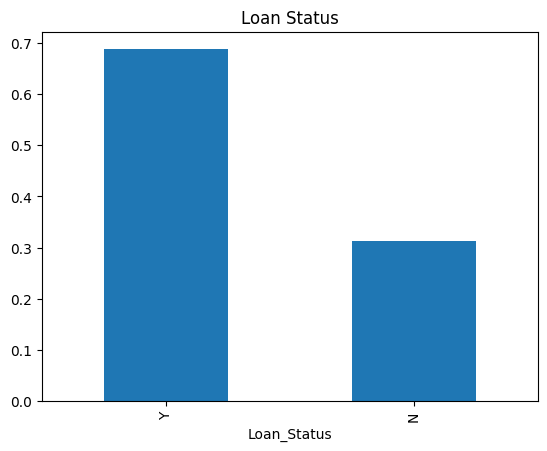

In [11]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()
# normalize = True will give the probability in y-axis

plt.title("Loan Status")

# Plots for Independent Categorical Variables

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

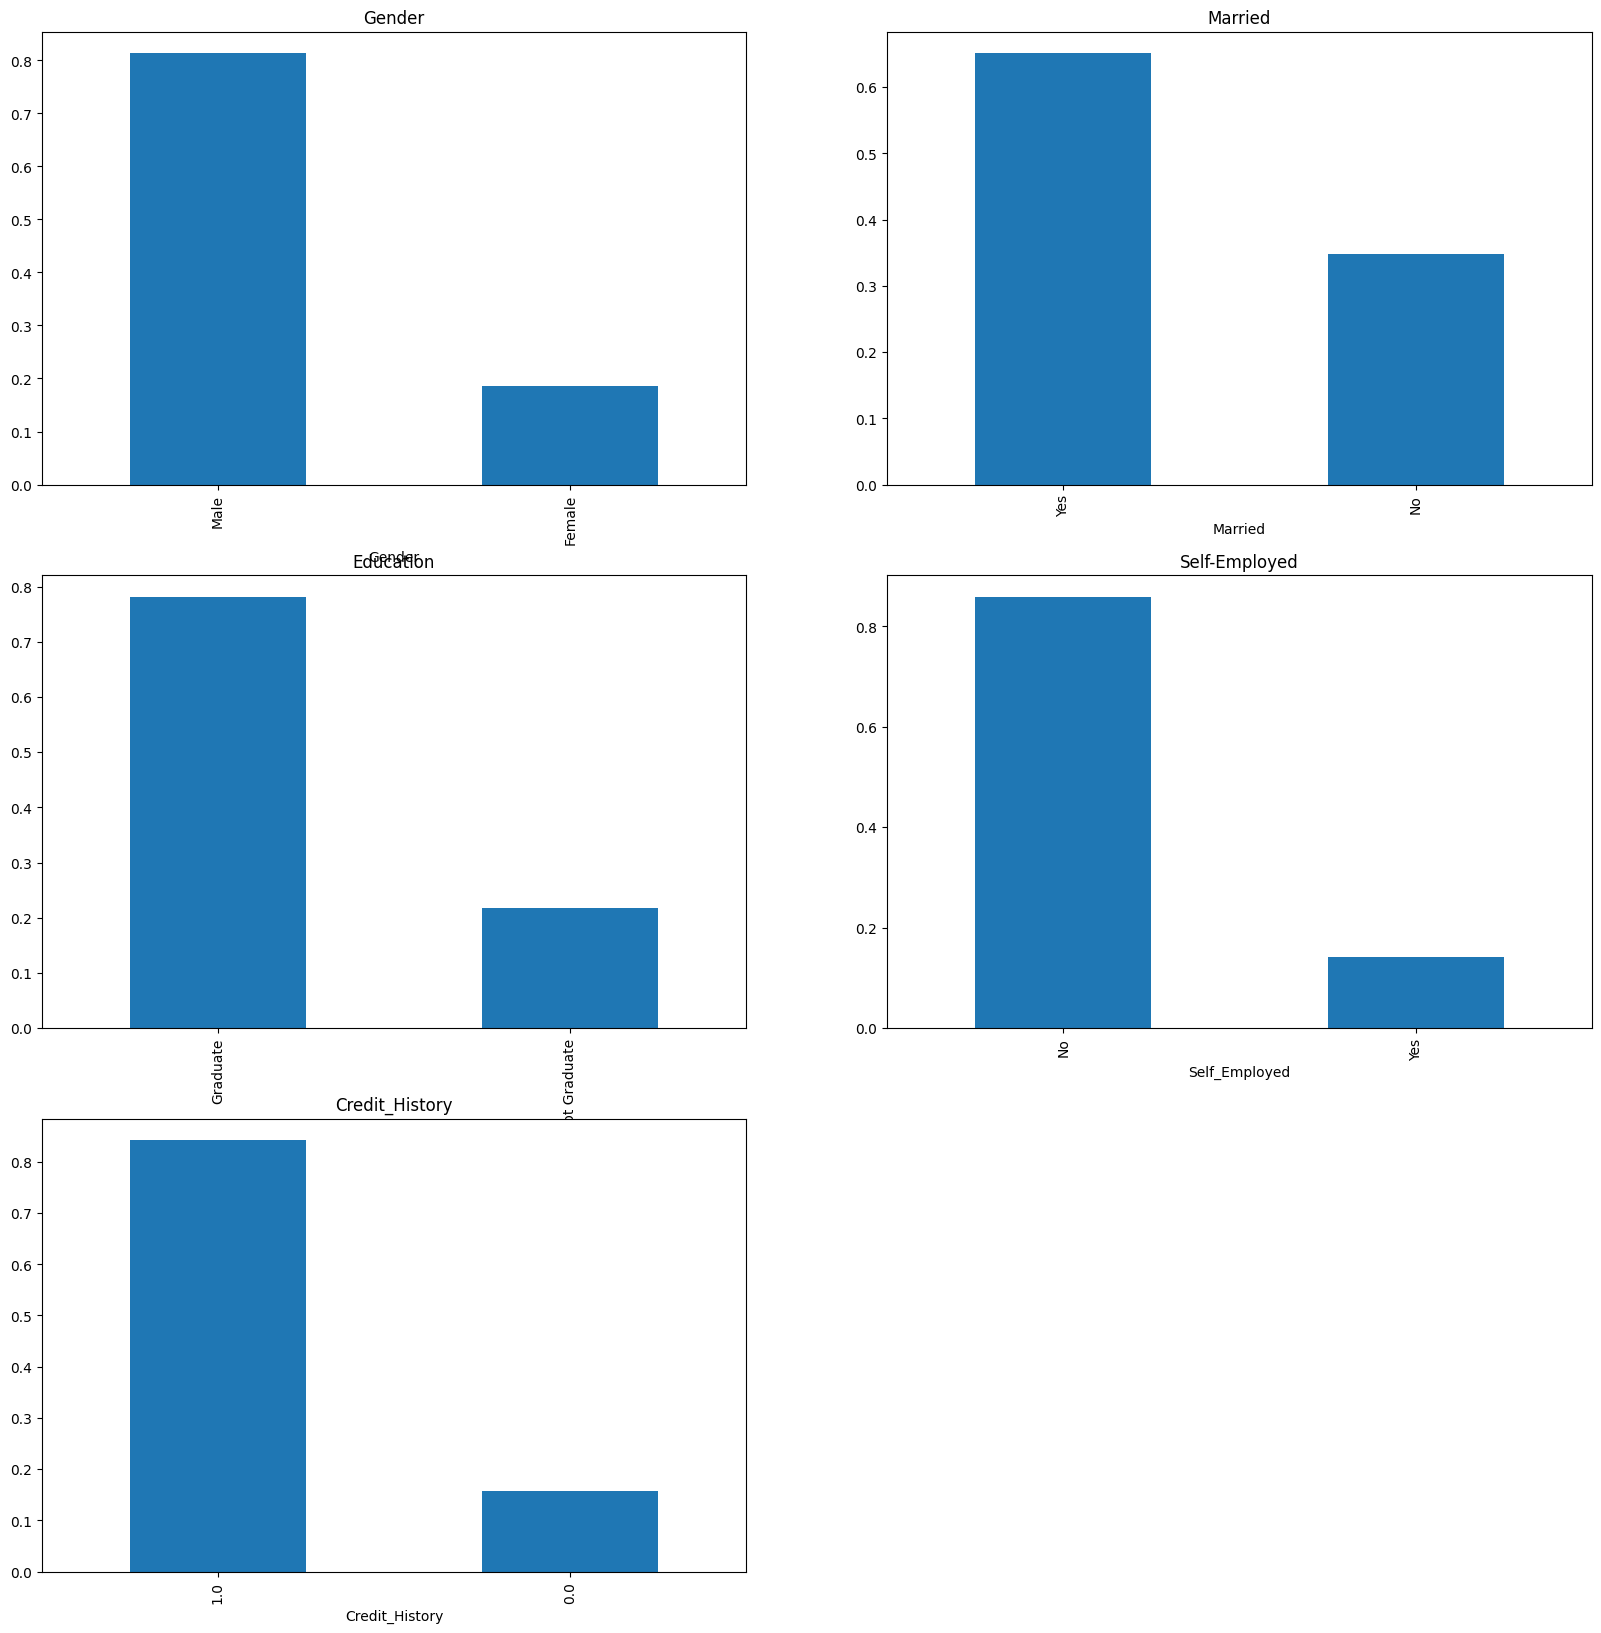

In [12]:
plt.figure()
plt.subplot(321)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Gender')

plt.subplot(322)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Married')

plt.subplot(323)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Education')

plt.subplot(324)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Self-Employed')

plt.subplot(325)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Credit_History')

# Plots for Independent Ordinal Variables

<Axes: title={'center': 'Property Area'}, xlabel='Property_Area'>

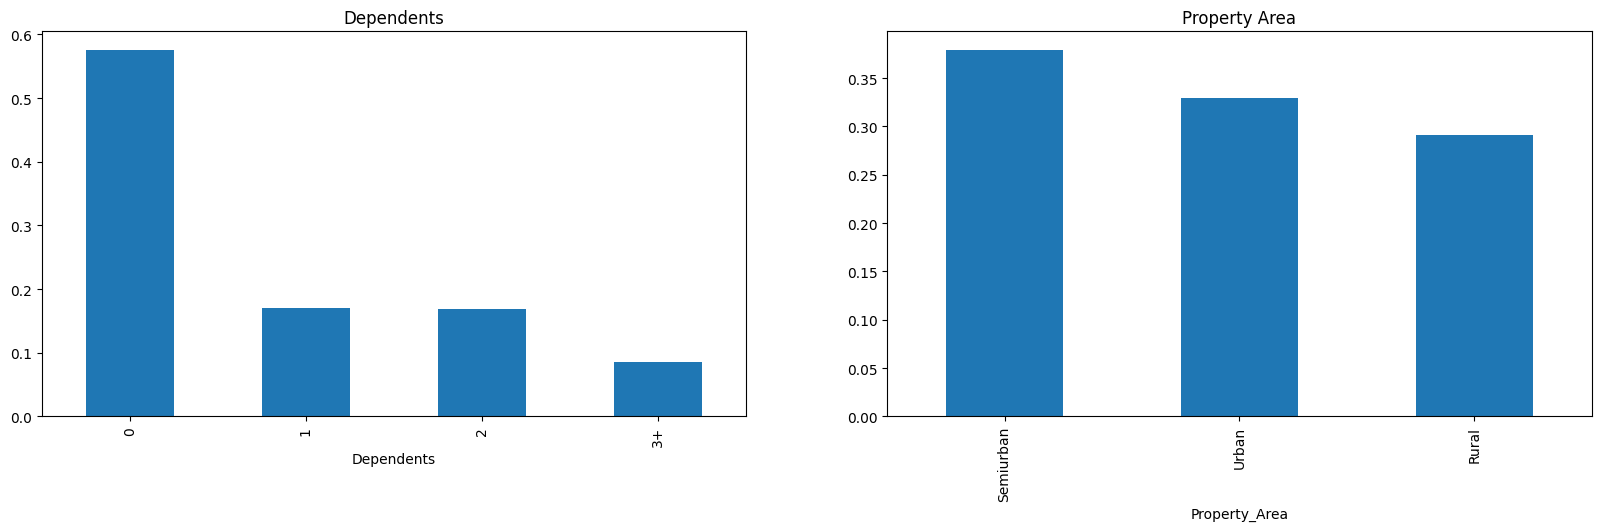

In [13]:
plt.figure()
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Property Area')

# Plots for Independent Numerical Variables

<Axes: >

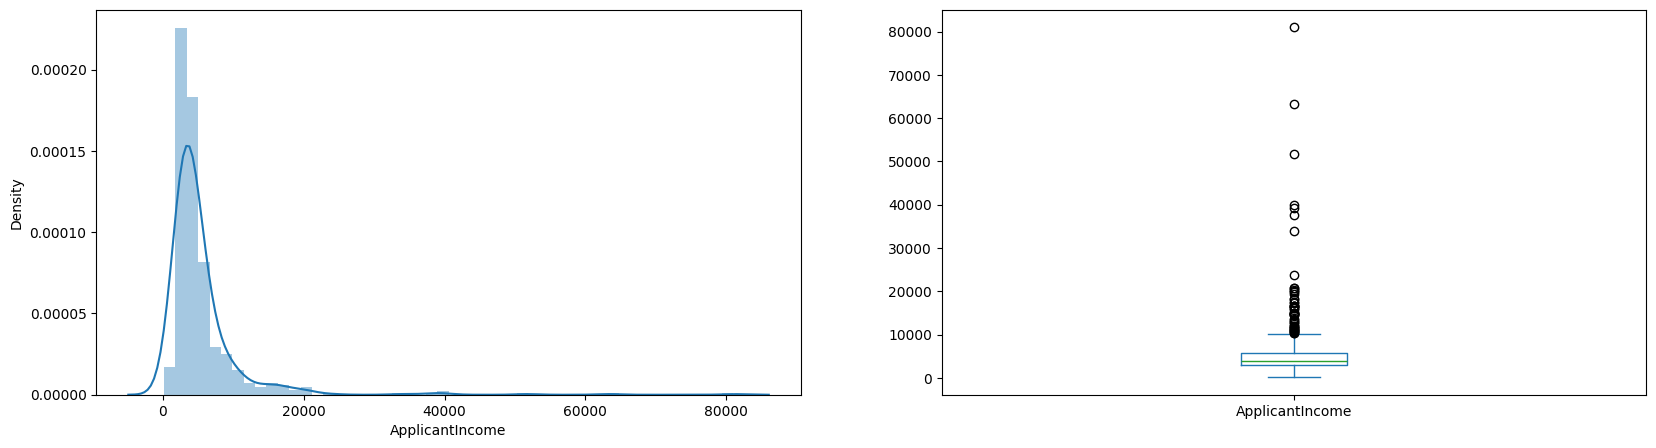

In [14]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(20,5))

Text(0.5, 0.98, '')

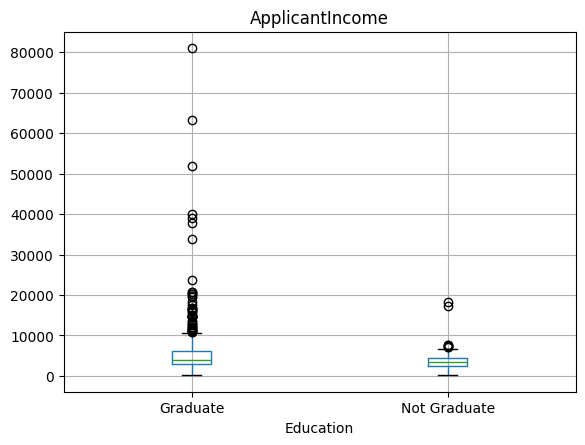

In [15]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

# Co-applicant Income

<Axes: >

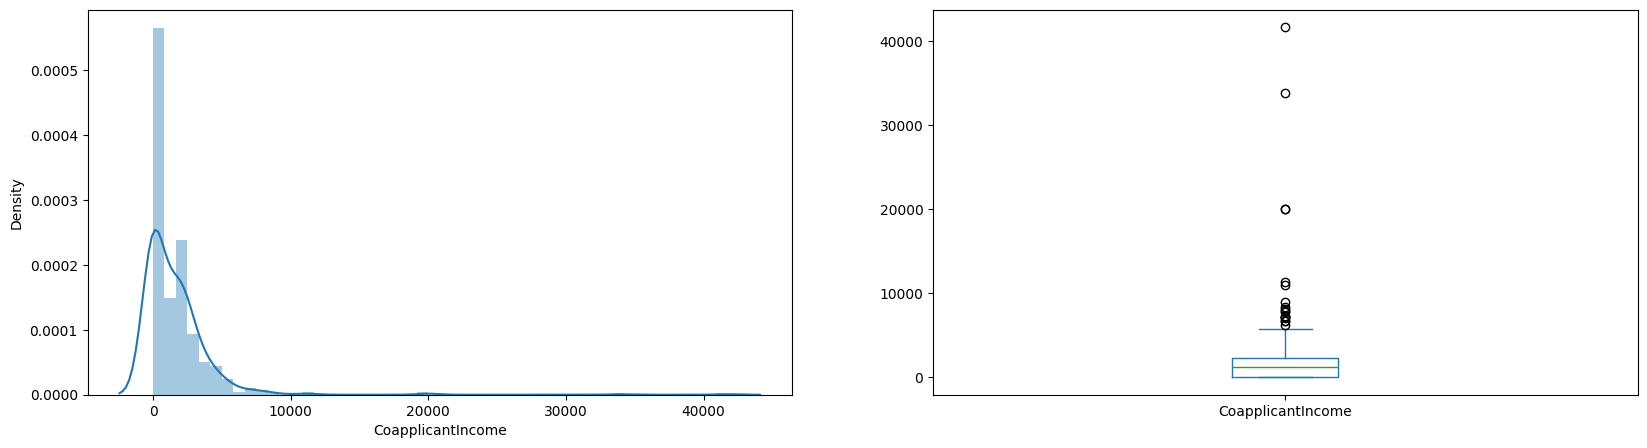

In [16]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(20,5))

<Axes: >

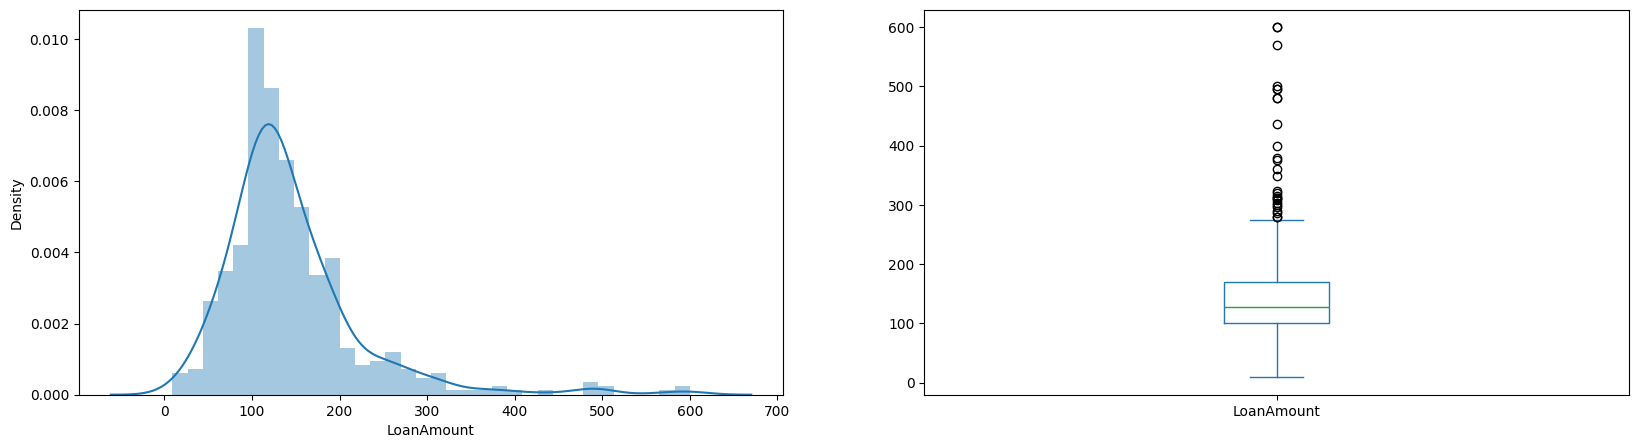

In [17]:
df=train.dropna()
plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(20,5))

# Bivariant Analysis

In [18]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<Axes: xlabel='Gender'>

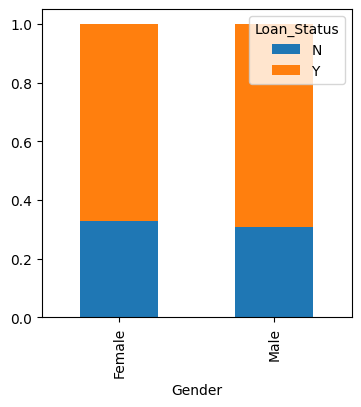

In [19]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# Frequency Table for Married and Loan Status

In [20]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


<Axes: xlabel='Married'>

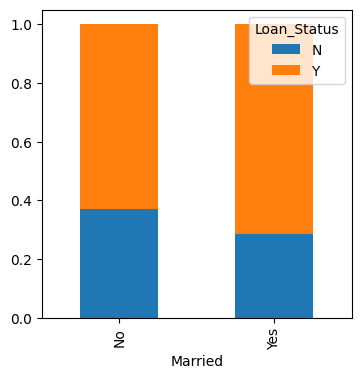

In [21]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# Frequency Table for Dependents and Loan Status

In [22]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


<Axes: xlabel='Dependents'>

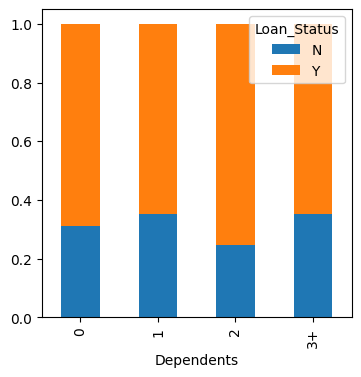

In [23]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


# Frequency Table for Education and Loan Status

In [24]:
Education= pd.crosstab(train['Education'],train['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<Axes: xlabel='Education'>

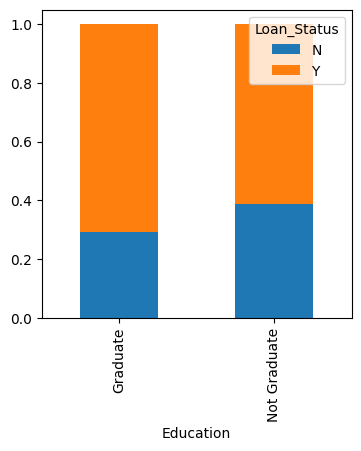

In [25]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4) )

# Frequency Table for Self Employed and Loan Status

In [26]:
Self_Employed= pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


<Axes: xlabel='Self_Employed'>

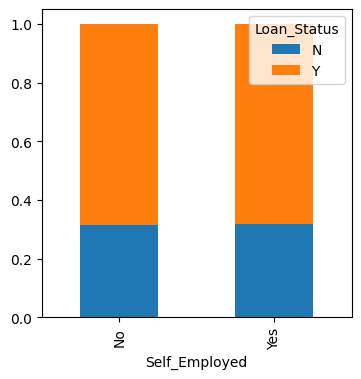

In [27]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

# Frequency Table for Credit History and Loan Status

In [28]:
Credit_History= pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<Axes: xlabel='Credit_History'>

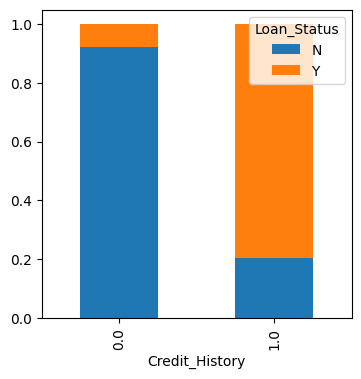

In [29]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

# Frequency Table for Property Area and Loan Status

In [30]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


<Axes: xlabel='Property_Area'>

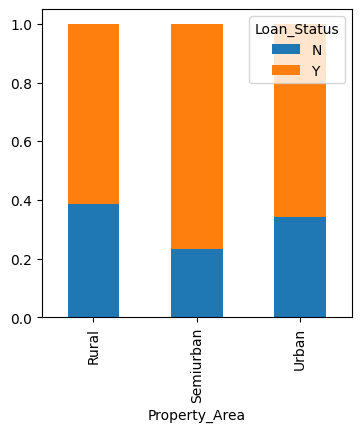

In [31]:
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

# Plotting of Numerical Categorical Variable and Loan Status

In [32]:
bins=[0,2500,4000,6000,8100] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

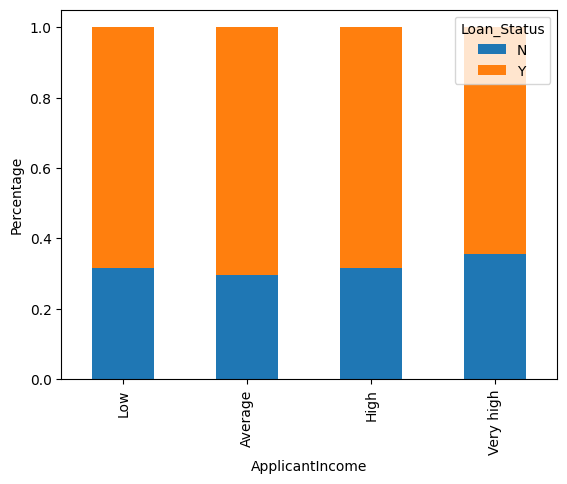

In [33]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P=plt.ylabel('Percentage')

# Doing the same for Coapplicant Income

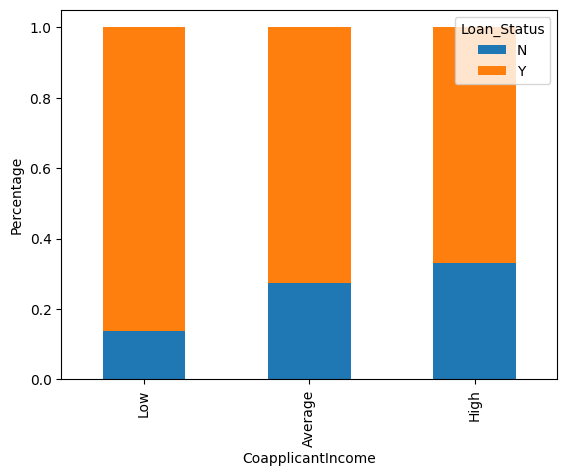

In [34]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

# Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

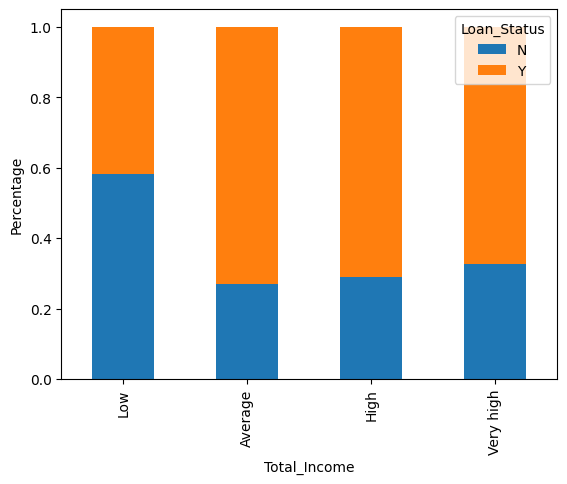

In [35]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

# Plotting of Loan Amount and Loan Status

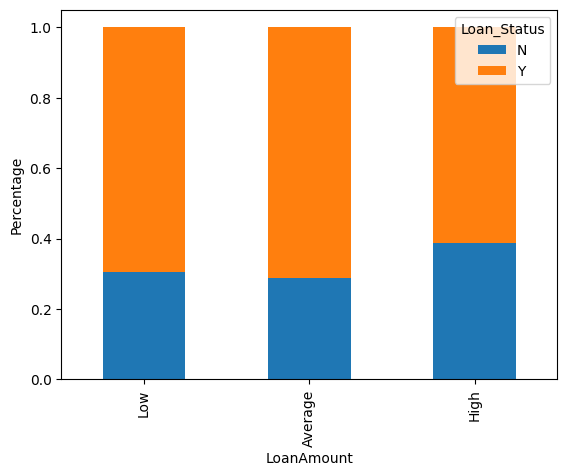

In [36]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

# Change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1

In [37]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 

# Convert the target variable 'Loan Status' categories into 0 and 1 for logistic regression

In [38]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

# Correlation using Heatmaps

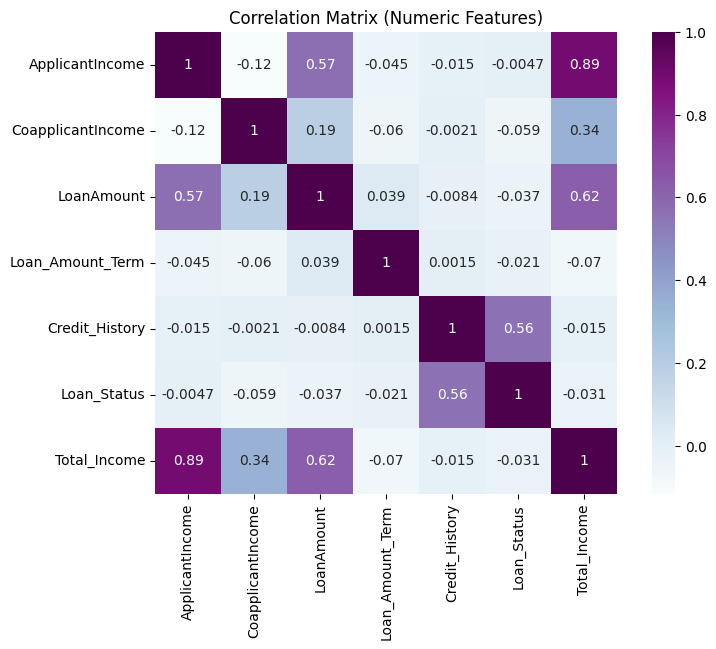

In [39]:
# Select only numeric columns from train
numeric_train = train.select_dtypes(include=[np.number])

# Compute correlation matrix
matrix = numeric_train.corr()

# Plot the heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(matrix, square=True, cmap="BuPu", annot=True)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()



In [40]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [41]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# Handling the missing Data

In [42]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [44]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [45]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [46]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [47]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [48]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [49]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [50]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [51]:
test['Married'].fillna(test['Married'].mode()[0],inplace=True)

In [52]:
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

In [53]:

test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

In [54]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [55]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [56]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

# Outlier Treatment

<Axes: >

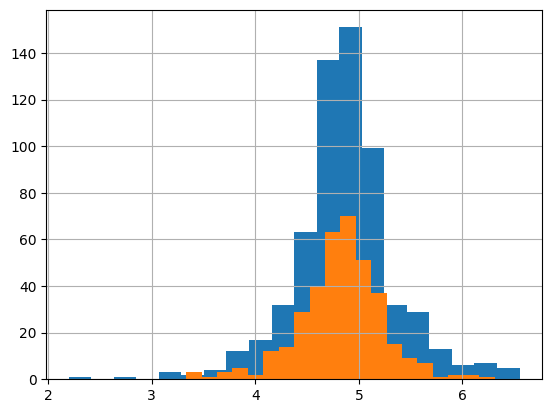

In [57]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 


test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

# Model Building

In [58]:
train=train.drop('Loan_ID',axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [59]:
from sklearn.linear_model import LogisticRegression


In [60]:
test=test.drop('Loan_ID',axis=1)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709


In [61]:
train=train.drop('Gender',axis=1)
test=test.drop('Gender',axis=1)

In [62]:
train=train.drop('Dependents',axis=1)
test=test.drop('Dependents',axis=1)

In [63]:
train=train.drop('Self_Employed',axis=1)
test=test.drop('Self_Employed',axis=1)

In [64]:
x=train.drop('Loan_Status',axis=1)
x.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,No,Graduate,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Yes,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Yes,Graduate,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Yes,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,No,Graduate,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [65]:
y=train['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# Creating Dummy Varible

In [66]:
x=pd.get_dummies(x) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

def stratified_cross_validation(model):
    """
    This function performs Stratified Shuffle Split.
    Accepts the model as an argument and returns stratified 
    randomized fold scores and model predictions.
    """
    
    counter = 1 
    pred_scores = []
    kf = StratifiedShuffleSplit(n_splits=4, random_state=1, test_size=0.25)
    
    for train_index, test_index in kf.split(X, y):
        xtr, xvl = X.loc[train_index], X.loc[test_index]
        ytr, yvl = y[train_index], y[test_index]
        
        model.fit(xtr, ytr)
        pred_test = model.predict(xvl)
        score = accuracy_score(yvl, pred_test)
        pred = model.predict_proba(xvl)[:, 1]
        
        pred_scores.append(score)
        counter += 1
        
    return pred_scores, pred_test


In [68]:
def display_cf_matrix(y_cv,model_pred):
    
    """This function draws the confusion matrix. Accepts true values of the target and the predicted values of the target made by 
    the model as an argument"""
    
    cf_matrix = confusion_matrix(y_cv,model_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    labels = [f"{v1}: {v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [69]:
def accuracy_metrics(y_test,predictions):

  """This function prints the classification report of the model which includes Precion, Recall and F-1 Score"""

  report = classification_report(y_test, predictions)
  print(report)


# Baseline Model: Applying Logistic Regression

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(x, y, train_size=0.75, random_state=0)


In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [72]:
baseline_lr = model.predict(x_cv)

In [73]:
print("Accuracy of the Baseline Model is {}".format(round(accuracy_score(y_cv,baseline_lr)*100,2)), "%")

Accuracy of the Baseline Model is 83.77 %


In [74]:
from sklearn.metrics import classification_report


In [75]:
accuracy_metrics(y_cv,baseline_lr)

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



In [76]:
from sklearn.metrics import confusion_matrix


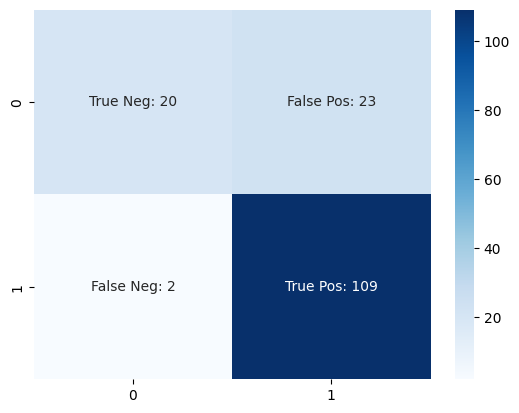

In [77]:
display_cf_matrix(y_cv,baseline_lr)

# Feature Engineering

In [78]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome'] 

In [79]:
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome'] 

<Axes: xlabel='Total_Income', ylabel='Density'>

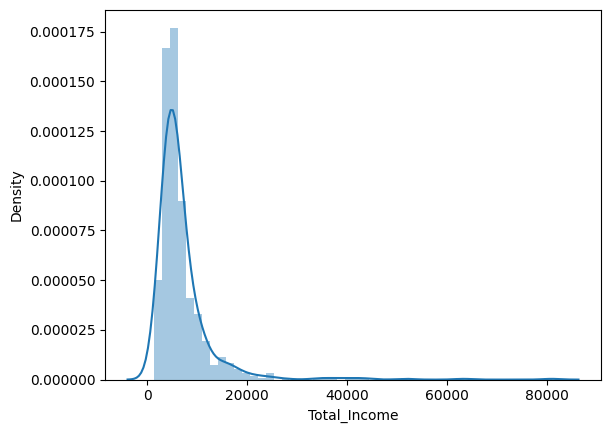

In [80]:
sns.distplot(train['Total_Income'])

In [81]:
train['Total_Income_log'] = np.log(train['Total_Income'])

In [82]:
test['Total_Income_log'] = np.log(test['Total_Income'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

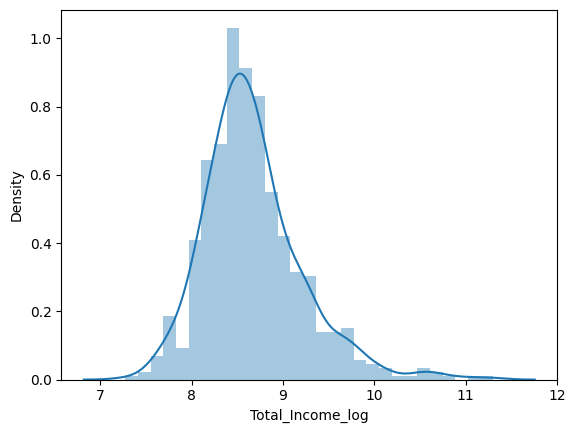

In [83]:
sns.distplot(train['Total_Income_log'])

# EMI: EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate EMI by taking the ratio of loan amount with respect to loan amount term.

In [84]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term'] 

In [85]:
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term'] 

<Axes: xlabel='EMI', ylabel='Density'>

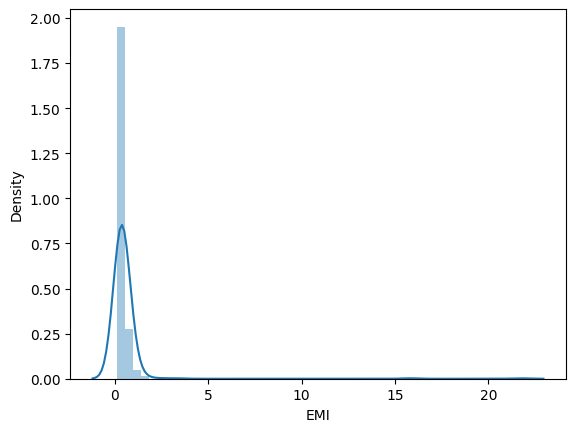

In [86]:
sns.distplot(test['EMI'])

# Balance Income: This is the income left after the EMI has been paid. Idea behind creating this variable is that if the value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [87]:
train['Balance_Income'] = train['Total_Income'] - (train['EMI'] * 1000)

In [88]:
test['Balance_Income'] = test['Total_Income'] - (test['EMI'] * 1000)

<Axes: xlabel='Balance_Income', ylabel='Density'>

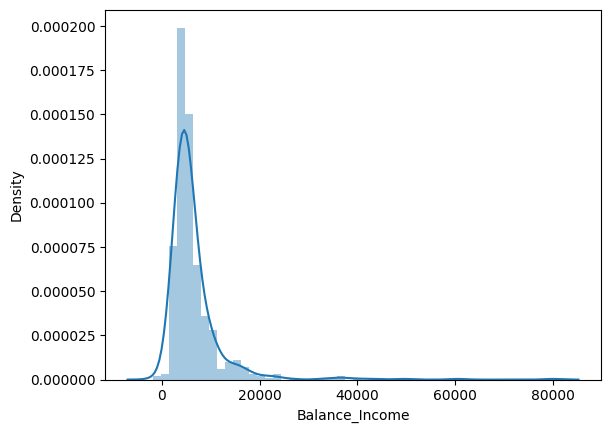

In [89]:
sns.distplot(train['Balance_Income'])

# Model Building

In [90]:
X=train.drop('Loan_Status',axis=1)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,5849,0.0,128.0,360.0,1.0,4.852030,True,False,True,False,False,False,True,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,4.852030,False,True,True,False,True,False,False,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,4.189655,False,True,True,False,False,False,True,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,4.787492,False,True,False,True,False,False,True,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,4.948760,True,False,True,False,False,False,True,6000.0,8.699515,0.391667,5608.333333


In [91]:
y = train.Loan_Status

# Logistic Regression Model

In [92]:
lr_model = LogisticRegression(random_state=1)

In [93]:
lr_model_score, lr_model_pred = stratified_cross_validation(lr_model)

In [94]:
from statistics import mean


In [95]:
print("\nMean of Accuracy Scores=",mean(lr_model_score))


Mean of Accuracy Scores= 0.7743506493506493


In [96]:
print(classification_report(y_cv,lr_model_pred))

              precision    recall  f1-score   support

           0       0.25      0.02      0.04        43
           1       0.72      0.97      0.83       111

    accuracy                           0.71       154
   macro avg       0.48      0.50      0.44       154
weighted avg       0.59      0.71      0.61       154



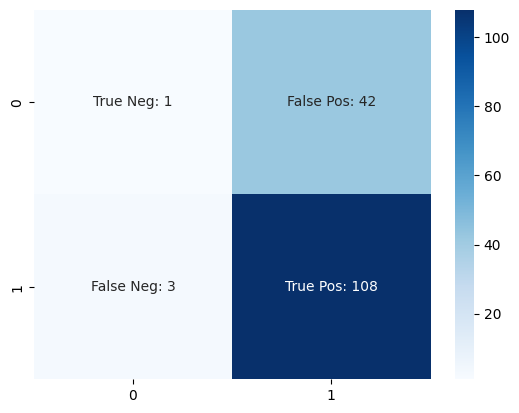

In [97]:
display_cf_matrix(y_cv,lr_model_pred)

# Decision Tree Model

In [98]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(random_state=1)


In [99]:

dt_model = tree.DecisionTreeClassifier(random_state=1)

In [100]:
dt_model_score, dt_model_pred = stratified_cross_validation(dt_model)

In [101]:
print("\nMean of Accuracy Scores=",mean(dt_model_score))


Mean of Accuracy Scores= 0.7061688311688312


In [102]:
print(classification_report(y_cv,dt_model_pred))

              precision    recall  f1-score   support

           0       0.29      0.33      0.30        43
           1       0.72      0.68      0.70       111

    accuracy                           0.58       154
   macro avg       0.50      0.51      0.50       154
weighted avg       0.60      0.58      0.59       154



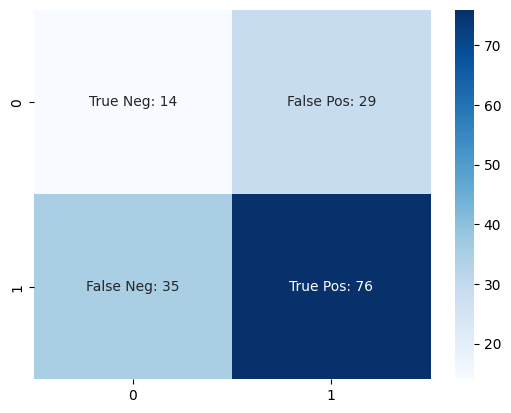

In [103]:
display_cf_matrix(y_cv,dt_model_pred)

# Random Forest Model

In [104]:
from sklearn.ensemble import RandomForestClassifier


In [105]:
rf_model = RandomForestClassifier(random_state=1, max_depth=10)

In [106]:
rf_model_score, rf_model_pred = stratified_cross_validation(rf_model)

In [107]:
print("\nMean of Accuracy Scores=",mean(rf_model_score))


Mean of Accuracy Scores= 0.8003246753246753


In [108]:
print(classification_report(y_cv,rf_model_pred))

              precision    recall  f1-score   support

           0       0.19      0.12      0.14        43
           1       0.70      0.80      0.75       111

    accuracy                           0.61       154
   macro avg       0.44      0.46      0.45       154
weighted avg       0.56      0.61      0.58       154



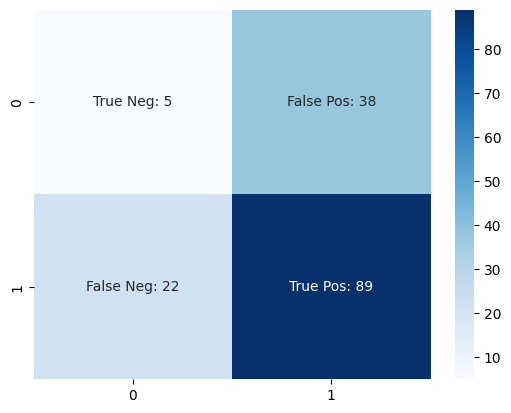

In [109]:
display_cf_matrix(y_cv,rf_model_pred)

# Hyper-Parameter Tuning

In [110]:

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [111]:
paramgrid = {
    'max_depth': list(range(1, 20, 2)),
    'n_estimators': list(range(1, 200, 20))
}

In [112]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, train_size=0.75, random_state=1)

In [113]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

# Estimating the optimized value

In [114]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=141, random_state=1)

# Tuned Random Forest Model

In [115]:
hyper_rf_model =  RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)

In [116]:
hyper_rf_model_score, hyper_rf_model_pred = stratified_cross_validation(hyper_rf_model)

In [117]:
print("\nMean of Accuracy Scores=",mean(hyper_rf_model_score))


Mean of Accuracy Scores= 0.8035714285714286


In [118]:
print(classification_report(y_cv,hyper_rf_model_pred))

              precision    recall  f1-score   support

           0       0.29      0.14      0.19        49
           1       0.68      0.84      0.75       105

    accuracy                           0.62       154
   macro avg       0.48      0.49      0.47       154
weighted avg       0.55      0.62      0.57       154



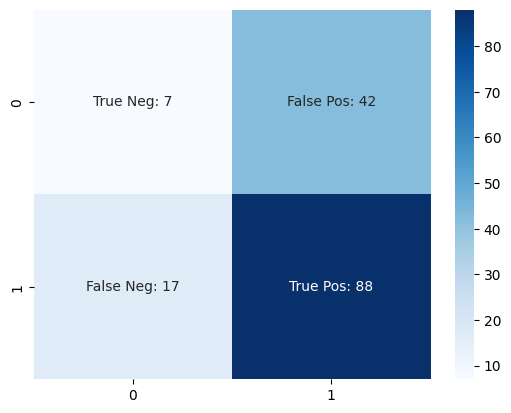

In [119]:
display_cf_matrix(y_cv,hyper_rf_model_pred)

# Feature Importance

In [120]:
importances= pd.Series(hyper_rf_model.feature_importances_, index = X.columns).sort_values()

<Axes: >

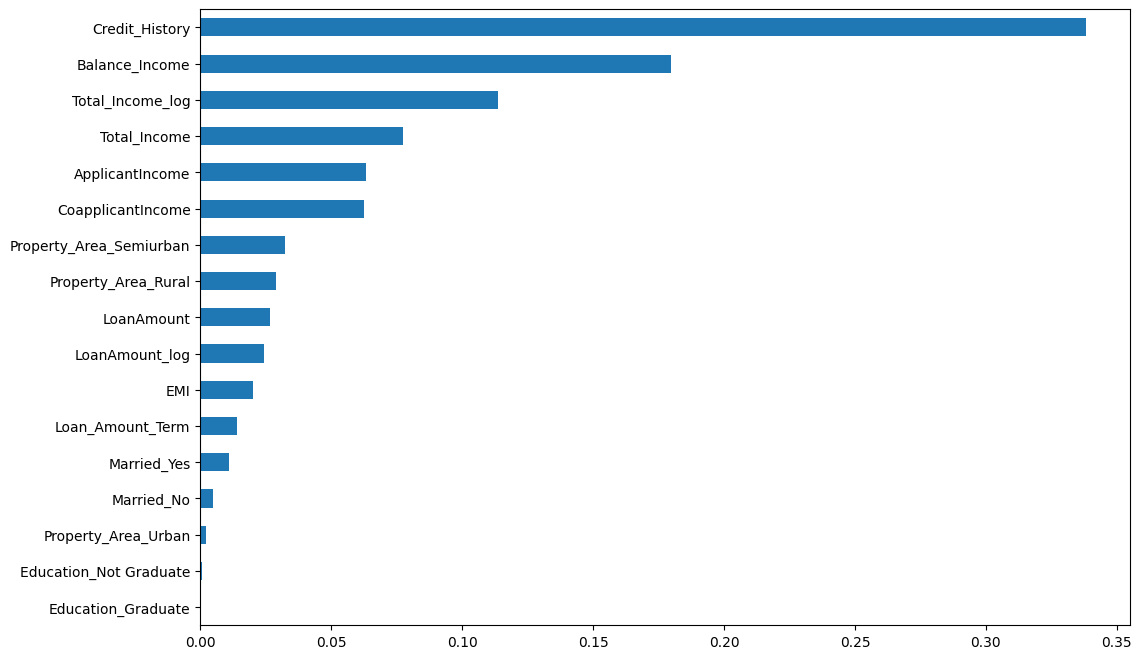

In [121]:
importances.plot(kind='barh', figsize=(12,8))

# XGBoost

In [ ]:
xgb_model = XGBClassifier(random_state=1, max_depth=4, n_estimators=50)

In [ ]:

xgb_model_score, xgb_model_pred = stratified_cross_validation(xgb_model)

In [124]:
from xgboost import XGBClassifier
from statistics import mean

xgb_model = XGBClassifier(random_state=1, max_depth=4, n_estimators=50)
xgb_model_score, xgb_model_pred = stratified_cross_validation(xgb_model)

print("\nMean of Accuracy Scores =", mean(xgb_model_score))



Mean of Accuracy Scores = 0.7581168831168832


In [125]:
print(classification_report(y_cv,xgb_model_pred))

              precision    recall  f1-score   support

           0       0.31      0.20      0.25        49
           1       0.68      0.79      0.73       105

    accuracy                           0.60       154
   macro avg       0.50      0.50      0.49       154
weighted avg       0.56      0.60      0.58       154



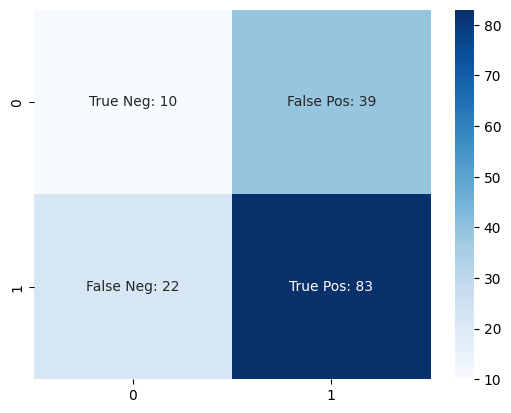

In [126]:

display_cf_matrix(y_cv,xgb_model_pred)